# Reading external and internal Data & Plotting

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# API
To pull cryptocurrencies prices from public API and Download them as excel files. Libraries necessary:

- requests (to pull data from the web)
- pandas (to process it)

In [15]:
import requests

In [16]:
# A predefinid function that simplifies the process of importing data from Cryptowatch (https://cryptowat.ch/)

def get_historic_price(symbol, exchange='bitfinex', after='2019-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

### Pull data from Bitcoin and Ether, two of the most popular cryptocurrencies, for the last 30 days:

In [18]:
last_month = (pd.Timestamp.now() - pd.offsets.Day(30))
last_month

Timestamp('2020-12-30 16:55:19.452627')

In [19]:
# Bitcoin
btc = get_historic_price('btc', 'bitstamp', after=last_month)

In [20]:
# Ether
eth = get_historic_price('eth', 'bitstamp', after=last_month)

In [22]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2020-12-30 17:00:00,28160.90,28232.10,27896.34,28150.92,457.983947,1.286516e+07
2020-12-30 18:00:00,28150.92,28328.68,28050.00,28257.46,422.149256,1.190804e+07
2020-12-30 19:00:00,28259.01,28534.08,28246.00,28525.26,595.872076,1.692029e+07
2020-12-30 20:00:00,28523.16,28917.39,28465.73,28813.76,1213.070914,3.487729e+07
2020-12-30 21:00:00,28807.89,29010.32,28605.54,28805.91,758.997803,2.186878e+07


In [23]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2020-12-30 17:00:00,734.28,738.52,727.49,733.10,11577.431851,8.474084e+06
2020-12-30 18:00:00,732.74,738.36,730.50,736.23,2774.426259,2.038735e+06
2020-12-30 19:00:00,736.48,742.91,733.20,742.27,2244.357032,1.652650e+06
2020-12-30 20:00:00,742.18,758.50,741.09,753.27,9487.254789,7.123631e+06
2020-12-30 21:00:00,754.00,755.49,747.86,752.10,4383.270595,3.294505e+06


In [21]:
# 1 month of data 
btc.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,724.000000,724.000000,724.000000,724.000000,724.000000,7.240000e+02
mean,34355.134102,34708.092127,33936.127155,34360.510594,629.941101,2.155919e+07
std,3219.494709,3251.187895,3172.740217,3211.242668,581.029212,2.000827e+07
min,28150.920000,28232.100000,27734.000000,28150.920000,67.542690,2.203225e+06
25%,31917.857500,32285.335000,31586.575000,31921.260000,292.844000,1.002853e+07
50%,34146.850000,34602.055000,33672.545000,34138.425000,455.153659,1.544487e+07
75%,36666.340000,36964.585000,36237.200000,36628.602500,787.665153,2.708522e+07
max,41506.240000,42000.000000,40987.890000,41522.560000,6148.975313,2.252597e+08


In [25]:
#PS: 1 month of data
# 724 = count
# 24 = hours
724 / 24
# result = 30 days

30.166666666666668

In [24]:
# 1 month of data 
eth.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,724.000000,724.000000,724.000000,724.000000,724.000000,7.240000e+02
mean,1157.168467,1172.249876,1139.924075,1157.845912,6718.566742,7.758995e+06
std,190.241571,192.104629,187.385533,189.678797,6531.646612,7.339450e+06
min,720.890000,729.550000,716.240000,721.770000,630.825677,4.605004e+05
25%,1075.395000,1092.682500,1051.677500,1075.862500,3018.849133,3.415615e+06
50%,1216.645000,1228.395000,1197.280000,1217.225000,4808.890761,5.702505e+06
75%,1288.485000,1306.955000,1266.477500,1290.152500,7835.636208,9.476186e+06
max,1458.000000,1476.060000,1422.490000,1458.000000,58218.397402,6.456846e+07


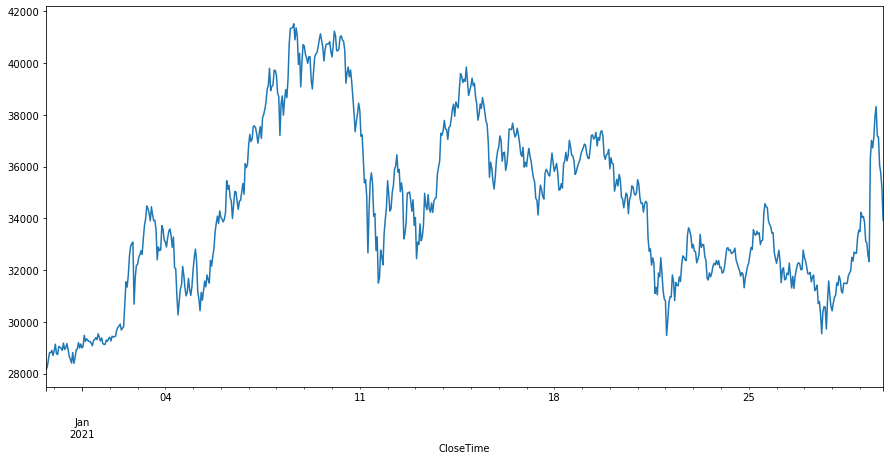

In [26]:
# Plot
btc['ClosePrice'].plot(figsize=(15,7))

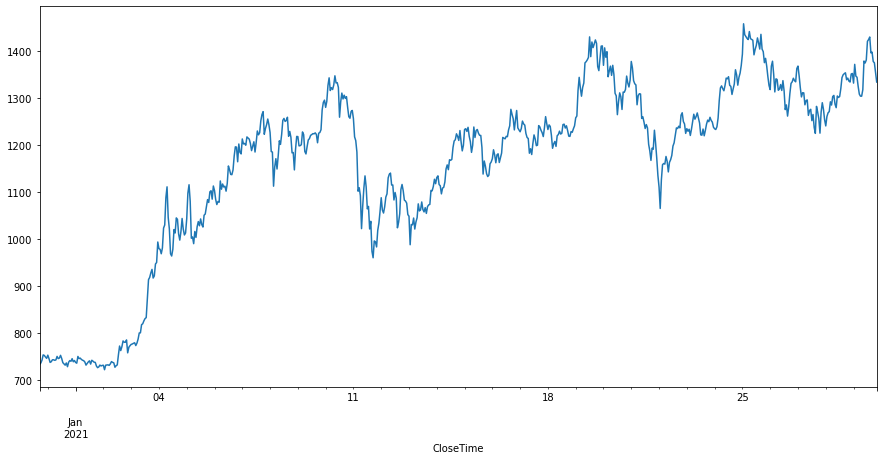

In [27]:
# Plot
eth['ClosePrice'].plot(figsize=(15,7))

In [28]:
# Dynamic plots with Bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [29]:
output_notebook()

Loading BokehJS ...

In [30]:
# plot
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"
show(p1)

### Exporting to CSV

In [38]:
# Save the last month data:
btc.to_csv('data/bitcoin_data.csv')

In [39]:
# Save the last month data:
eth.to_csv('data/ether_data.csv')

# CSV file
- Load data
- Remove the header
- Set header names
- Turn the column(Timestamp->objetc) to datetime
- Set the index of the df to be the "Timestamp"

In [3]:
# Load & transf.
# Dataframe 1: Bitcoin
df = pd.read_csv(
    'data/btc-market-price.csv',
    header=None,
    names=['Timestamp', 'Price'],
    index_col=0,
    parse_dates=True
)

In [4]:
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


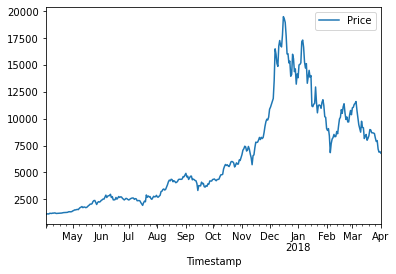

In [5]:
# Plot
df.plot()

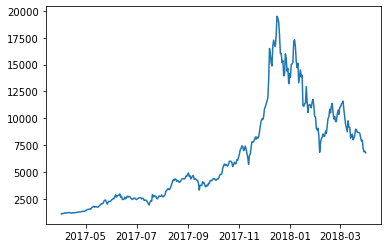

In [6]:
# or create a similar plot with the plt.plot() function
plt.plot(df.index, df['Price'])

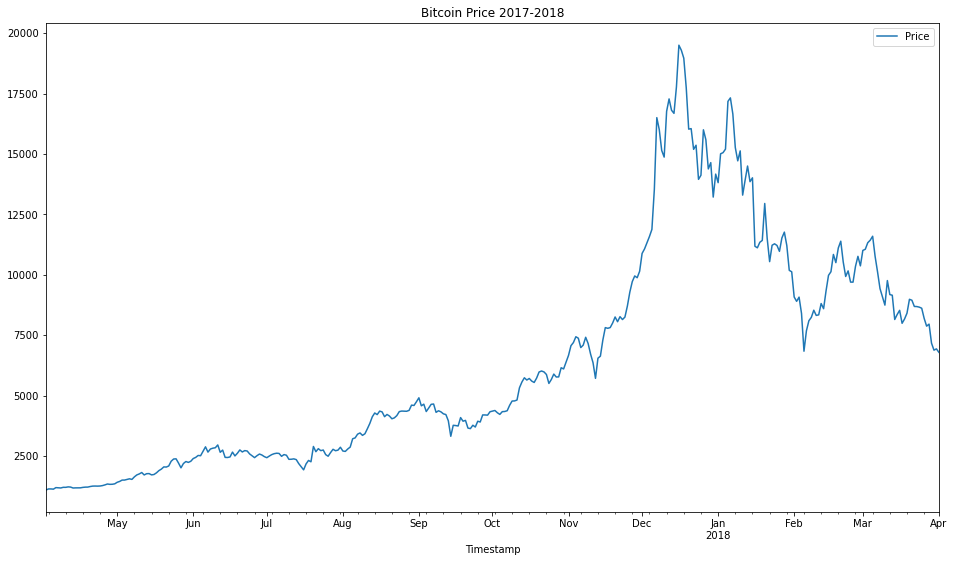

In [7]:
df.plot(figsize=(16, 9), title='Bitcoin Price 2017-2018')

In [8]:
# Load & transf.
# Dataframe 2: Ether
eth = pd.read_csv('data/eth-price.csv', parse_dates=True, index_col=0)
print(eth.info())

eth.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 362 entries, 2017-04-02 to 2018-04-01
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UnixTimeStamp  362 non-null    int64  
 1   Value          362 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.5 KB
None


,UnixTimeStamp,Value
Date(UTC),,
2017-04-02,1491091200,48.55
2017-04-03,1491177600,44.13
2017-04-04,1491264000,44.43
2017-04-05,1491350400,44.90
2017-04-06,1491436800,43.23


### We can combine both DataFrames into one: 
- Both have the same index, so aligning both prices will be easy. 
- Let's first create an empty DataFrame and with the index from Bitcoin prices:

In [9]:
# first create an empty df (they have the same index)
prices = pd.DataFrame(index=df.index)

prices.head()

""
Timestamp
2017-04-02
2017-04-03
2017-04-04
2017-04-05
2017-04-06


In [10]:
# And we can now just set columns from the other DataFrames:
prices['Bitcoin'] = df['Price']

In [11]:
prices['Ether'] = eth['Value']

In [12]:
prices.head()

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


We can now try plotting both values:

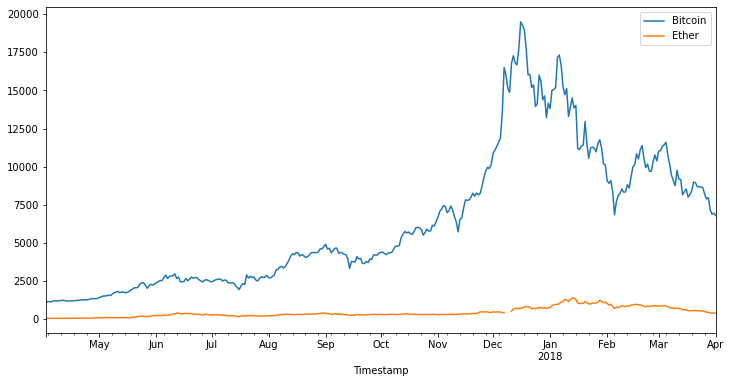

In [13]:
prices.plot(figsize=(12, 6))

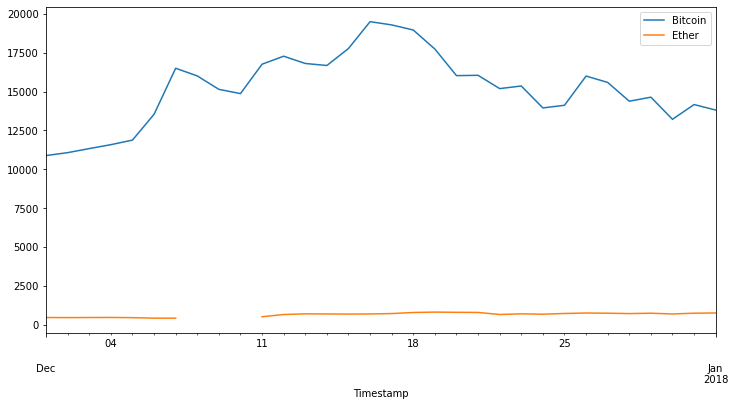

In [14]:
# Seems like there's a tiny gap between Dec 2017 and Jan 2018. Let's zoom in there:
prices.loc['2017-12-01':'2018-01-01'].plot(figsize=(12, 6))

# End